In [41]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import AutoMinorLocator
import IPython
import imgkit

# Simple code to extract data from your saved DLS data

In [ ]:
# First indicate your desired data set or file
imported_file = pd.read_csv('file path', header= None, skiprows=[0,1,2])

# Select and declare youe x and y values
lagtime = imported_file.iloc[28:,0]
corrfx = imported_file.iloc[28:,1]

# Plot
plt.scatter(lagtime, corrfx, label = 'Data name')
plt.xscale("log")
plt.xlabel('Lag time (s)')
plt.ylabel('G\u2082(t)-1')  
plt.xlim(1E-3, 1E5)
plt.ylim(-0.1, 1)
plt.title('Example')
plt.show()
plt.savefig('filename')

# Calculation code to get a relaxation time from Correlation Function

In [ ]:
# Fitting to 𝑔(𝑡)=𝐴𝑒𝑥𝑝[−(𝑡/𝜏)^𝛽]

def g(t, A, tau, beta):
    return A * np.exp(-(t/tau)**beta)

# Re-identify the parameters (optional)
t = lagtime
g_t = corrfx

# Set initial values
p0 = [1, 1, 1]

# Set the parameter bounds
bounds = ([0, 0.001, 0], [1, 100000, 1])

params, cov = curve_fit(g, t, g_t, p0, bounds=bounds)
A_fit, tau_fit, beta_fit = params

# Read the fitted parameters
print('Fitted parameters:')
print('A =', A_fit)
print('Relaxation time (tau) =', tau_fit) 
print('Stretched exponent function, (Beta) =', beta_fit)

# Plot the fitting
t_fit = np.logspace(-3, 4.5, 1000)
g_fit = g(t_fit, A_fit, tau_fit, beta_fit)

# Plot
plt.scatter(t, g_t, marker='o', facecolors='none', linewidths=3, edgecolors='black', label='Data')
plt.semilogx(t_fit, g_fit, linestyle='solid', color = 'goldenrod', linewidth=3,  label='Fit data')
plt.xscale("log")
plt.xlabel('Lag time (s)')
plt.ylabel('G\u2082(t)-1')  
plt.xlim(1E-3, 1E5)
plt.ylim(-0.1, 1)
plt.title('Example')
plt.show()
plt.savefig('filename')

# Example 1 - Correlation function vs Lag time 

This will not work when you run it on your desktop due to the file path

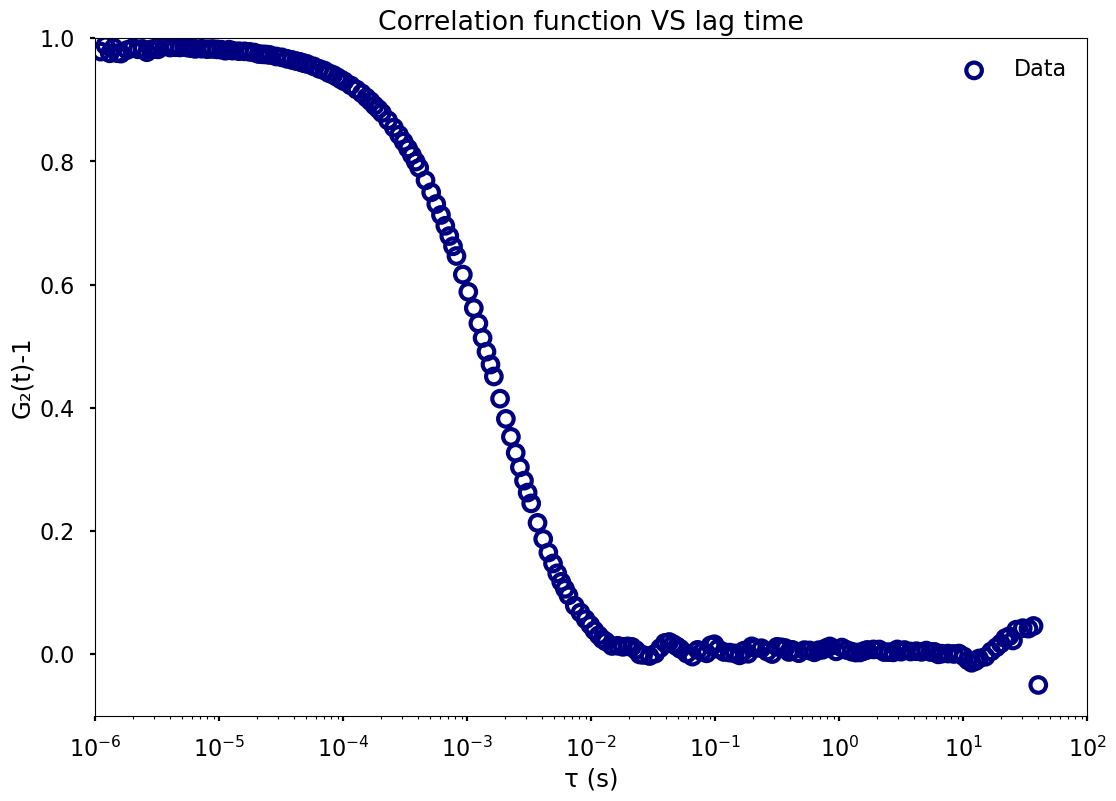

In [31]:
# Suspension at 65.1 degree, 20C, 2D Autocorrelation
# Import Correlation Function data 
sample = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/0.01CNF/Measurement 1/Repetition3/Correlation Function.csv', header= None, skiprows=[0,1,2])

lagtime = sample.iloc[28:,0]
corrfx = sample.iloc[28:,1]

plt.scatter(lagtime, corrfx, marker='o', facecolors='none', linewidths=3, edgecolors='navy', label = 'Data')

plt.style.use('seaborn-poster')
plt.xscale("log")
plt.xlabel('\u03C4 (s)')
plt.ylabel('G\u2082(t)-1')  
plt.legend(frameon=False)
plt.xlim(1E-6, 1E2)
plt.ylim(-0.1, 1)
plt.title('Correlation function VS lag time')
plt.show()


Fitted parameters:
A = 0.9919303631877341
Relaxation time (tau) = 0.0022406707181266148
Stretched exponent function, (Beta) = 0.8530705296568919


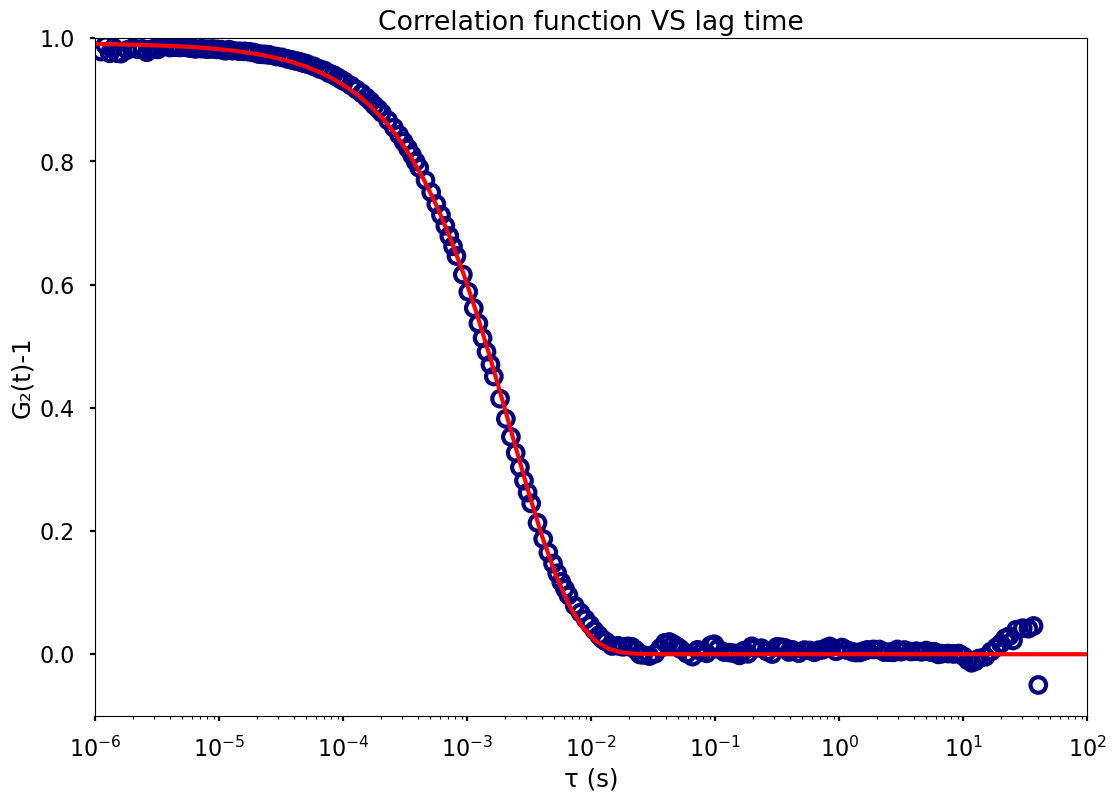

In [24]:
def g(t, A, tau, beta):
    return A * np.exp(-(t/tau)**beta)
t = lagtime
g_t = corrfx
p0 = [1, 1, 1]
bounds = ([0, 0.001, 0], [1, 100000, 1])

params, cov = curve_fit(g, t, g_t, p0, bounds=bounds)
A_fit, tau_fit, beta_fit = params

print('Fitted parameters:')
print('A =', A_fit)
print('Relaxation time (tau) =', tau_fit) 
print('Stretched exponent function, (Beta) =', beta_fit)

t_fit = np.logspace(-6, 4.5, 100)
g_fit = g(t_fit, A_fit, tau_fit, beta_fit)

plt.scatter(t, g_t, marker='o', facecolors='none', linewidths=3, edgecolors='navy', label='Data')
plt.semilogx(t_fit, g_fit, linestyle='solid', color = 'red', linewidth=3,  label='Fit data')

plt.style.use('seaborn-poster')
plt.xscale("log")
plt.xlabel('\u03C4 (s)')
plt.ylabel('G\u2082(t)-1')  
plt.xlim(1E-6, 1E2)
plt.ylim(-0.1, 1)
plt.title('Correlation function VS lag time')
plt.show()

# Example 2 - Hydrodynamic Radius vs Scattering Angles

In [74]:
sample2 = pd.read_csv('/Users/ningravi/Desktop/Python/RawData/20230505/Test_PS_2D/PS 100 nm - 0.01.csv', header= None, skiprows=[0,1,2,3])

theta = sample2.iloc[1:, 13]
r_hyd = sample2.iloc[1:, 3]
theta = theta.astype(float)
r_hyd = r_hyd.astype(float)

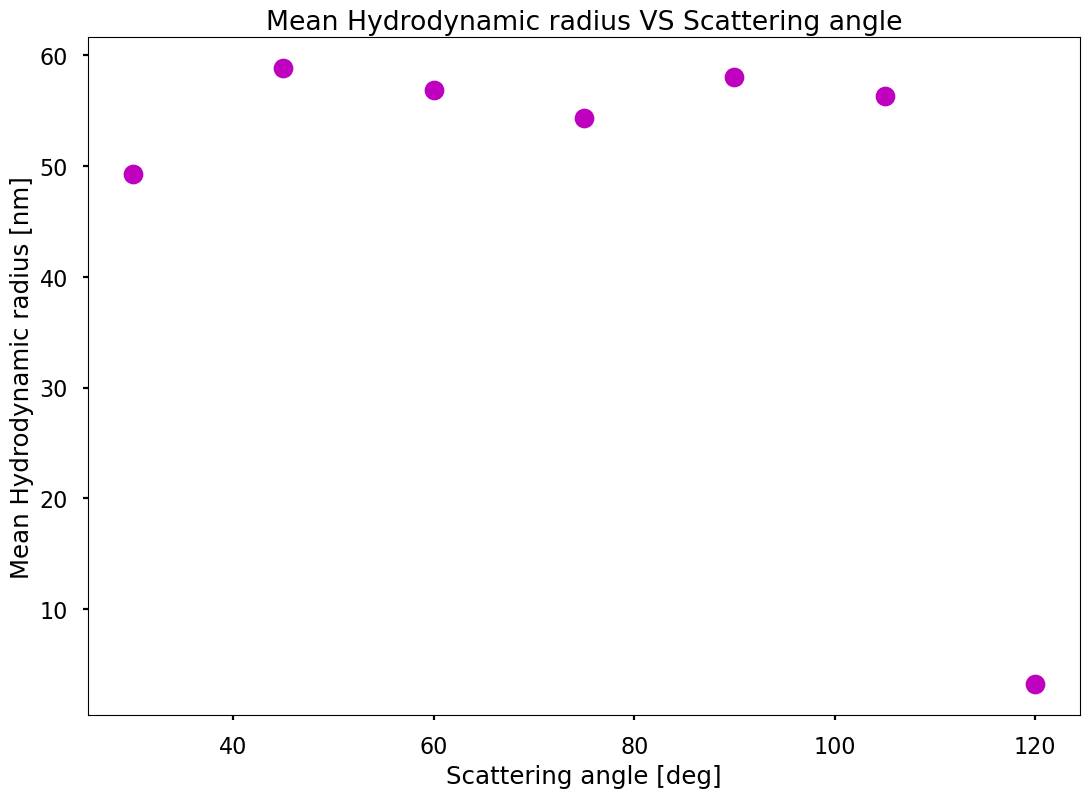

In [73]:
plt.scatter(theta, r_hyd, marker='o', linewidths=3, color='m', label='Data')

plt.style.use('seaborn-poster')
#plt.xscale("log")
plt.xlabel('Scattering angle [deg]')
plt.ylabel('Mean Hydrodynamic radius [nm]')  
#plt.xlim(1E-6, 1E2)
#plt.ylim(-0.1, 1)
plt.title('Mean Hydrodynamic radius VS Scattering angle')
plt.show()